# GitHub : https://github.com/KarisG/

In [138]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import data

In [139]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [140]:
print(X_train.shape, ": X_train")
print(y_train.shape, ": y_train")
print(X_test.shape, ": X_test")
print(y_test.shape, ": y_test")

(60000, 28, 28) : X_train
(60000,) : y_train
(10000, 28, 28) : X_test
(10000,) : y_test


In [141]:
# Reshape data 
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_test  = X_test.reshape(len(X_test), X_test.shape[1], X_test.shape[2], 1)

In [142]:
X_train.shape

(60000, 28, 28, 1)

* The problem here is that the MNIST dataset provides samples that have a shape of (28, 28). With, say, 60.000 samples, the training data Tensor would have a shape of (60000, 28, 28). Conv2D however expects four dimensions and this throws the error – simply because it also expects the channels dimension, which in MNIST is nonexistent because it’s grayscale data and hence is 1.*

# Visualize data

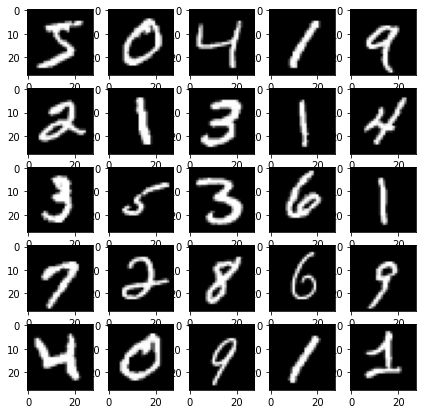

In [143]:
_, ax = plt.subplots(nrows=5, ncols=5, figsize=(7,7), facecolor=(1,1,1))

for i, ax in enumerate(ax.flatten()): #ax is an array, so I go through to it, then I use imshow (otherwise I should've used ax[0,0].imshow)
    ax.imshow(X_train[i], cmap='gray')

# Normalize data (put between 0 and 1 each pixel)

In [144]:
print("min :",X_train[0].min(),", max :", X_train[0].max())
print("min :",X_test[0].min(),", max :", X_test[0].max())

min : 0 , max : 255
min : 0 , max : 255


In [145]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [146]:
print("min :",X_train[0].min(),", max :", X_train[0].max())
print("min :",X_test[0].min(),", max :", X_test[0].max())

min : 0.0 , max : 1.0
min : 0.0 , max : 1.0


# Create model

In [159]:
model = tf.keras.Sequential() #link all neurons each others
#Input layer
model.add(tf.keras.layers.Input((28,28,1)))

#CNN
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')) #32 conv layers (32 features)
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2)) #I'm going to reset the output of certain neurons to 0. Here 25% of outputs. The point is to distribute the learning over all the neurons. Some neurons will take too much importance and therefore will be desactivated cyclically and I can transfer the learning process on the different neurons

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))

#Neural network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

#Output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [160]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)            

In [161]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model

In [162]:
batch_size = 512
epochs = 10

history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/10
118/118 [==============================] - 48s 402ms/step - loss: 0.6067 - accuracy: 0.8082 - val_loss: 0.1218 - val_accuracy: 0.9614
Epoch 2/10
118/118 [==============================] - 55s 469ms/step - loss: 0.1857 - accuracy: 0.9452 - val_loss: 0.0693 - val_accuracy: 0.9767
Epoch 3/10
118/118 [==============================] - 55s 466ms/step - loss: 0.1306 - accuracy: 0.9615 - val_loss: 0.0529 - val_accuracy: 0.9817
Epoch 4/10
118/118 [==============================] - 54s 461ms/step - loss: 0.1086 - accuracy: 0.9675 - val_loss: 0.0445 - val_accuracy: 0.9840
Epoch 5/10
118/118 [==============================] - 54s 460ms/step - loss: 0.0912 - accuracy: 0.9732 - val_loss: 0.0386 - val_accuracy: 0.9868
Epoch 6/10
118/118 [==============================] - 54s 457ms/step - loss: 0.0830 - accuracy: 0.9757 - val_loss: 0.0370 - val_accuracy: 0.9869
Epoch 7/10
118/118 [==============================] - 54s 461ms/step - loss: 0.0760 - accuracy: 0.9770 - val_loss: 0.0316 - val_ac

In [163]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0275 - accuracy: 0.9907


[0.02752588503062725, 0.9907000064849854]

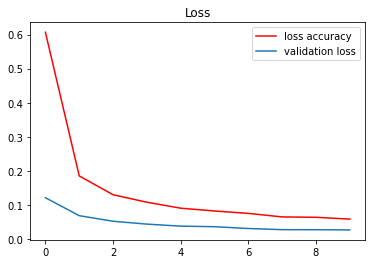

In [183]:
plt.plot(history.history['loss'], 'r', label='loss accuracy');
plt.plot(history.history['val_loss'], label='validation loss');
plt.title("Loss")
plt.legend();

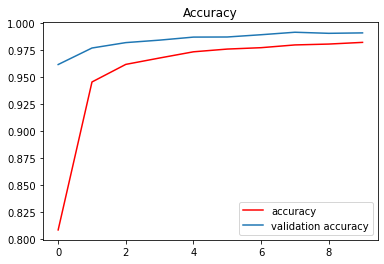

In [184]:
plt.plot(history.history['accuracy'], 'r', label='accuracy');
plt.plot(history.history['val_accuracy'], label='validation accuracy');
plt.title("Accuracy")
plt.legend();

In [168]:
pred = model.predict(X_test)

In [169]:
y_pred = np.argmax(pred, axis=-1)

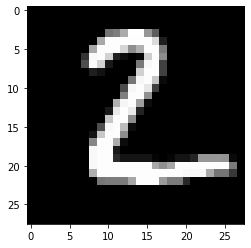

In [180]:
plt.imshow(X_test[1], cmap='gray');

In [178]:
y_pred[1]

2